In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as pl
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#import data in jupyter
data=pd.read_csv("DATA.csv")

source:https://towardsdatascience.com/data-visualization-exploration-using-pandas-only-beginner-a0a52eb723d5


# Get and read dataset

In [2]:
#observation
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [3]:
data.shape #81 variables

(2919, 81)

# Process and wrangle the data 

In [19]:
data2=data.dropna(subset=['SalePrice'])#Drop NA in saleprice 
line_data=data2[['1stFlrSF','2ndFlrSF','SalePrice','OverallQual']]
line_data['totalSF'] = line_data['1stFlrSF'] + line_data['2ndFlrSF']


C:\Users\hayle\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Build a simple regression model 

In [23]:
SLR=line_data[['OverallQual','SalePrice','totalSF']]
X=SLR[['OverallQual','totalSF']]
y=SLR['SalePrice']
regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
coef_SLR=pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coef_SLR

,Coefficient
OverallQual,32385.024969
totalSF,57.647922


In [11]:
check=data2[['SaleCondition','SalePrice']]


In [12]:
check2=pd.get_dummies(check,drop_first=1,columns=['SaleCondition'])

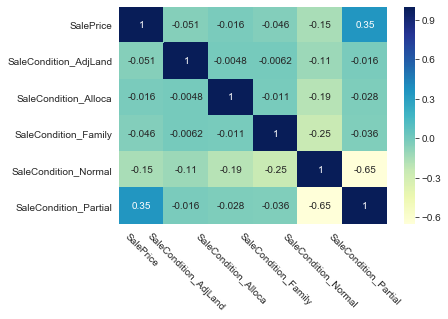

In [13]:
corr=check2.corr()
ax=sns.heatmap(corr,annot=True,cmap="YlGnBu")
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
sns.set_style("darkgrid")
pl.xticks(rotation=-45);

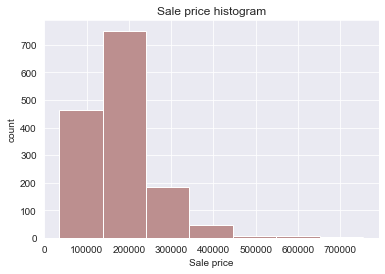

In [14]:
#saleprice histogram
plt.hist(data2['SalePrice'],7, color = "rosybrown",ec='white')
plt.xlabel('Sale price')
plt.ylabel('count')
plt.title('Sale price histogram');


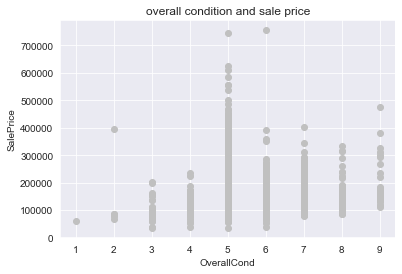

In [27]:
#scatter plot - overall condition - sale price
plt.scatter(data2['OverallCond'], data2['SalePrice'],color = "silver")
plt.xlabel('OverallCond')
plt.ylabel('SalePrice')
plt.title('overall condition and sale price');

